In [1]:
from langgraph.graph import StateGraph,START ,END
from typing import TypedDict,Literal 

In [2]:
class QuadState(TypedDict):
    a: int
    b:int
    c:int 
    
    equation : str
    discriminant : str
    result : str
    

In [3]:
def show_equ(state:QuadState):
    
    equation = f'{state["a"]}*x^2 + {state["b"]}*x + {state["c"]} = 0'
    return {"equation": equation}

In [4]:
def cal_discriminant(state : QuadState):
    a = state['a']
    b = state['b']
    c = state['c']
    
    discriminant = b**2 - 4*a*c
    return {"discriminant": str(discriminant)}

In [ ]:
def real_root(state:QuadState):
    root1 = (-state['b']+ int(state['discriminant']) **0.5)/(2*state['a'])
    root2 = (-state['b']- int(state['discriminant']) **0.5)/(2*state['a'])
    return {"result": f"real roots: {root1 } and {root2}"}

def repeated_root(state:QuadState):
    root = -state['b']/(2*state['a'])
    return {"result": f"repeated root: {root}"}

def no_real_root(state:QuadState):
    return {"result": "no real root"}

In [8]:
def check_condition(state:QuadState)-> Literal["real_root","repeated_root","no_real_root"]:
    discriminant = int(state['discriminant'])
    if discriminant > 0:
        return "real_root"
    elif discriminant == 0:
        return "repeated_root"
    else:
        return "no_real_root"

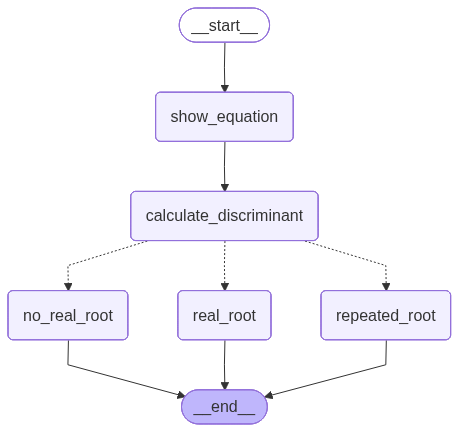

In [12]:
graph = StateGraph(QuadState)

graph.add_node('show_equation', show_equ)
graph.add_node('calculate_discriminant', cal_discriminant)
graph.add_node('real_root',real_root)
graph.add_node('no_real_root',no_real_root)
graph.add_node('repeated_root',repeated_root)



graph.add_edge(START ,'show_equation')
graph.add_edge('show_equation', 'calculate_discriminant')
graph.add_edge('calculate_discriminant', END)

graph.add_conditional_edges('calculate_discriminant',check_condition) ## the add all edges to end
graph.add_edge('real_root', END)
graph.add_edge('repeated_root', END)
graph.add_edge('no_real_root', END)


workflow = graph.compile()
workflow 


In [13]:
intial_state = {
    'a':4,
    'b':-5,
    'c':-4,
}
workflow.invoke(intial_state)

{'a': 4,
 'b': -5,
 'c': -4,
 'equation': '4*x^2 + -5*x + -4 = 0',
 'discriminant': '89',
 'result': 'real roots: 1.8042476415070754 and -0.5542476415070754'}